<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/Simula%C3%A7%C3%A3o_de_Fila_MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy

In [ ]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt

In [ ]:
class FilaMM1:

  def __init__(self, taxa_chegada, taxa_atendimento, horizonte):
    self.env = sp.Environment()
    self.n = 0
    self.taxa_chegada = taxa_chegada
    self.taxa_atendimento = taxa_atendimento
    self.horizonte = horizonte
    self.n_total_fila = 0
    self.tempos_fila = []
    self.n_tempos = []
    self.iteracao = 0
    self.convergencia = 0
    self.val_convergencia = 0

  def chegada(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.taxa_chegada))
      self.n += 1
      print(f"Alguém chegou!\n- n = {self.n}, t = {self.env.now})\n")

      self.n_total_fila += self.n
      self.tempos_fila.append(self.env.now)
      self.n_tempos.append(self.n)
      self.iteracao += 1

      if self.n == 1:
        self.env.process(self.atendimento())

  def atendimento(self):
    while self.n > 0:
      self.iteracao += 1
      yield self.env.timeout(np.random.exponential(1/self.taxa_atendimento))
      self.n -= 1
      self.tempos_fila.append(self.env.now)
      self.n_tempos.append(self.n)

      print(f"Alguém foi atendido!\n- n = {self.n}, t = {self.env.now})\n")

  def roda_simulacao(self):
    self.env.process(self.chegada())
    if self.n > 0:
      self.env.process(self.atendimento())
    self.env.run(until=self.horizonte)

    print("Final da simulação!")

In [ ]:
taxa_chegada = 2
taxa_atendimento = 3
horizonte = 300

fila_mm1 = FilaMM1(taxa_chegada, taxa_atendimento, horizonte)

fila_mm1.roda_simulacao()

Alguém chegou!
- n = 1, t = 0.38727944078245913)

Alguém chegou!
- n = 2, t = 0.44073354487575583)

Alguém chegou!
- n = 3, t = 1.2903011577560726)

Alguém foi atendido!
- n = 2, t = 1.7560212478417407)

Alguém foi atendido!
- n = 1, t = 2.1614614846545996)

Alguém chegou!
- n = 2, t = 2.2850260866118637)

Alguém chegou!
- n = 3, t = 2.408850204840667)

Alguém chegou!
- n = 4, t = 2.5978792640123696)

Alguém chegou!
- n = 5, t = 2.6621699642592467)

Alguém chegou!
- n = 6, t = 2.6992576294214605)

Alguém foi atendido!
- n = 5, t = 3.4481602308929435)

Alguém foi atendido!
- n = 4, t = 3.950531306827701)

Alguém chegou!
- n = 5, t = 4.279012443883528)

Alguém foi atendido!
- n = 4, t = 4.551384894941217)

Alguém chegou!
- n = 5, t = 4.717463746350159)

Alguém foi atendido!
- n = 4, t = 5.278440215944817)

Alguém chegou!
- n = 5, t = 5.481796208529871)

Alguém foi atendido!
- n = 4, t = 6.1572608766775145)

Alguém foi atendido!
- n = 3, t = 6.474475918671241)

Alguém chegou!
- n = 4, t =

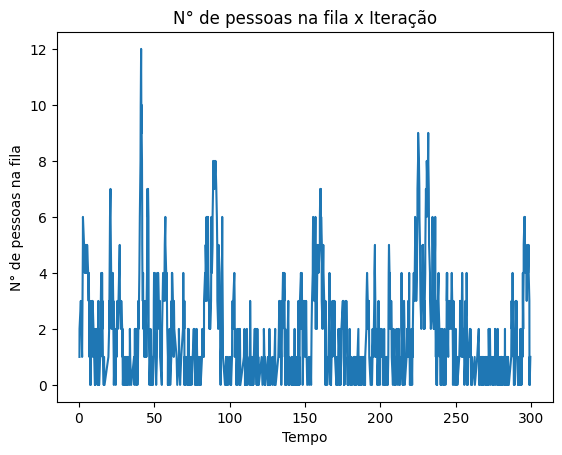

In [ ]:
plt.plot(fila_mm1.tempos_fila, fila_mm1.n_tempos)
plt.title("N° de pessoas na fila x Iteração")
plt.xlabel("Tempo")
plt.ylabel("N° de pessoas na fila")
plt.show()